汽车价格预测

#### 数据集简介


主要包括3类指标: 

- 汽车的各种特性.
- 保险风险评级：(-3, -2, -1, 0, 1, 2, 3).
- 每辆保险车辆年平均相对损失支付.

#### 类别属性
 
- make: 汽车的商标（奥迪，宝马。。。）
- fuel-type: 汽油还是天然气
- aspiration: 涡轮
- num-of-doors: 两门还是四门 
- body-style: 硬顶车、轿车、掀背车、敞篷车
- drive-wheels: 驱动轮
- engine-location: 发动机位置
- engine-type: 发动机类型
- num-of-cylinders: 几个气缸
- fuel-system: 燃油系统

#### 连续指标

- bore:                     continuous from 2.54 to 3.94.
- stroke:                   continuous from 2.07 to 4.17.
- compression-ratio:        continuous from 7 to 23.
- horsepower:               continuous from 48 to 288.
- peak-rpm:                 continuous from 4150 to 6600.
- city-mpg:                 continuous from 13 to 49.
- highway-mpg:              continuous from 16 to 54.
- price:                    continuous from 5118 to 45400.

#### 读取数据与分析

In [1]:
# loading packages
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization and missing values
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
import missingno as msno # missing values
%matplotlib inline

# stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error, r2_score

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.ensemble import RandomForestRegressor
seed = 123

# importing data ( ? = missing values)
path = r'C:\Users\guoqi\Desktop\大学规划\Machine_Learning_by_Andrew-Ng\回归分析\汽车价格预测\Auto-Data.csv'
data = pd.read_csv(path, na_values = ['?'])
data.columns

C:\Users\guoqi\AppData\Local\Temp\ipykernel_23644\3438397372.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [2]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [3]:
print('In total: ', data.shape)
data.head(5)

In total:  (205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### 缺失值处理

<AxesSubplot:>

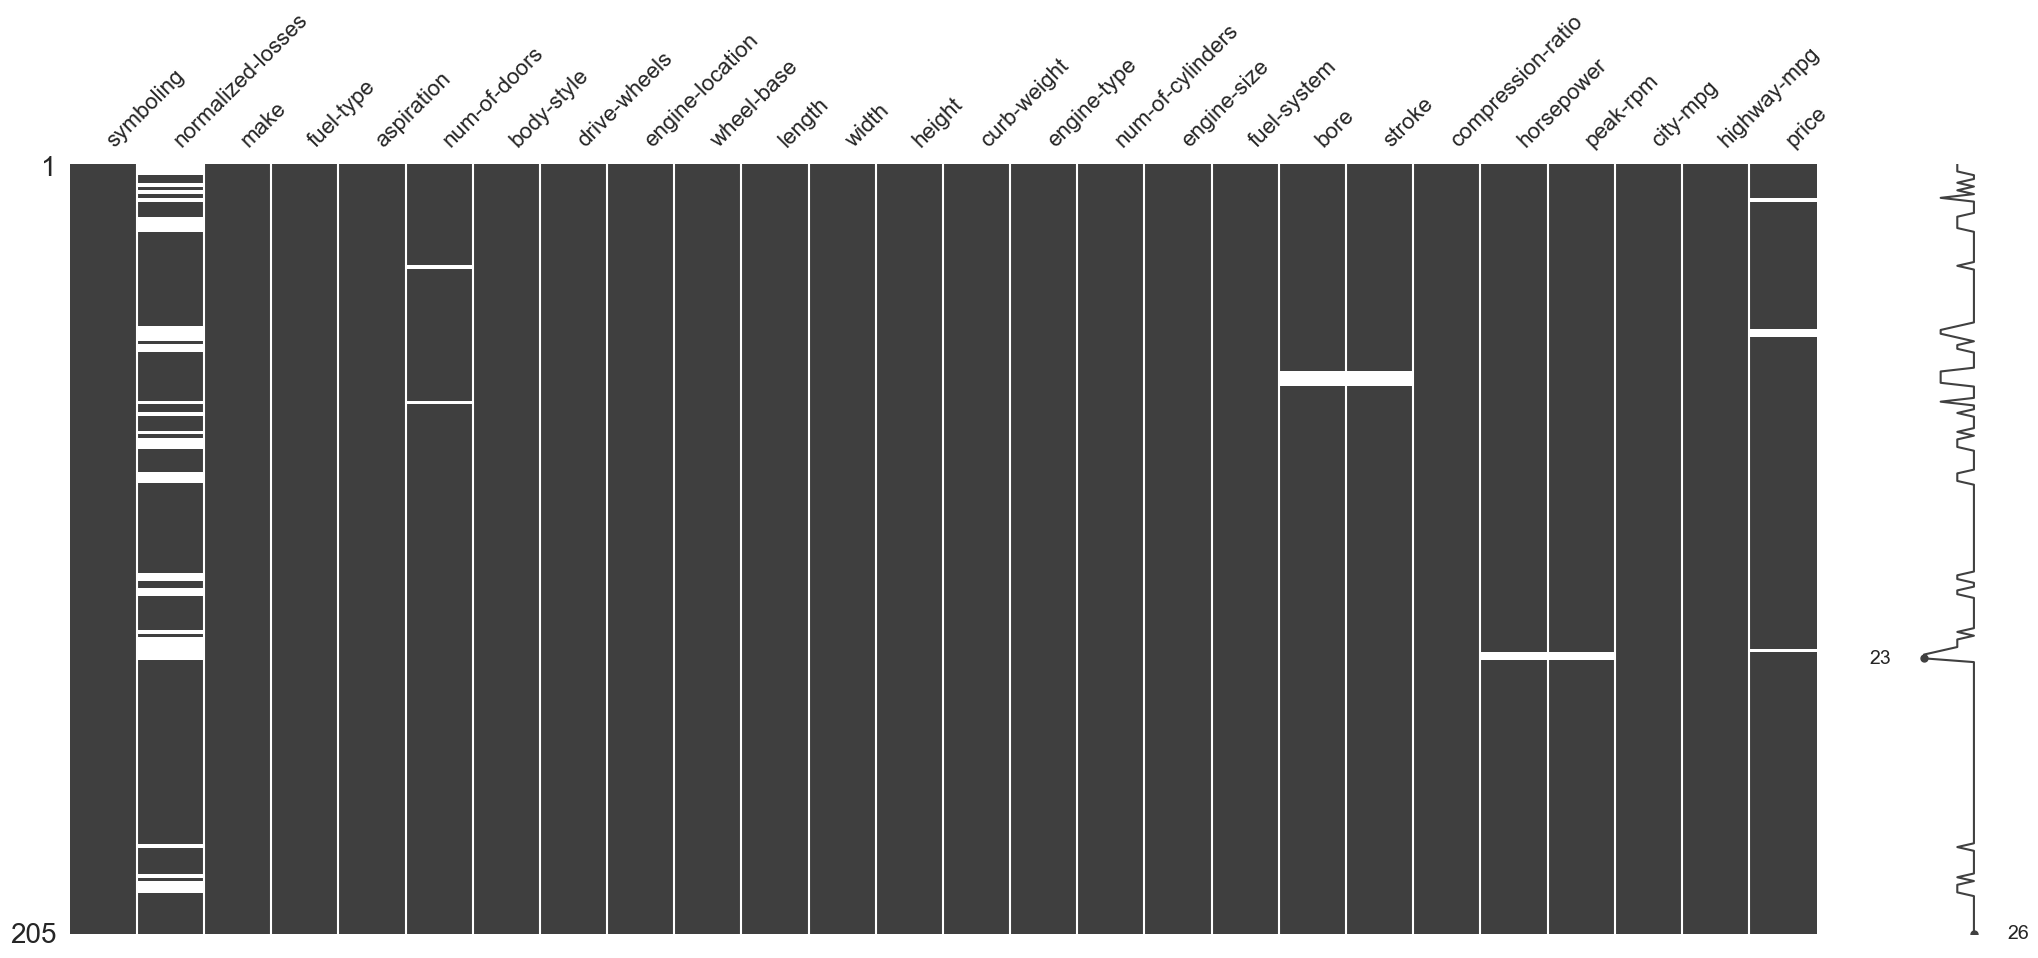

In [5]:
sns.set(style='ticks')

msno.matrix(data)

In [6]:
 #missing_values in normalied-losses
data[pd.isnull(data['normalized-losses'])].head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0


(array([12., 23., 34., 20., 16., 12., 18., 18.,  1.,  8.,  0.,  0.,  1.,
         1.]),
 array([ 65.        ,  78.64285714,  92.28571429, 105.92857143,
        119.57142857, 133.21428571, 146.85714286, 160.5       ,
        174.14285714, 187.78571429, 201.42857143, 215.07142857,
        228.71428571, 242.35714286, 256.        ]),
 <BarContainer object of 14 artists>)

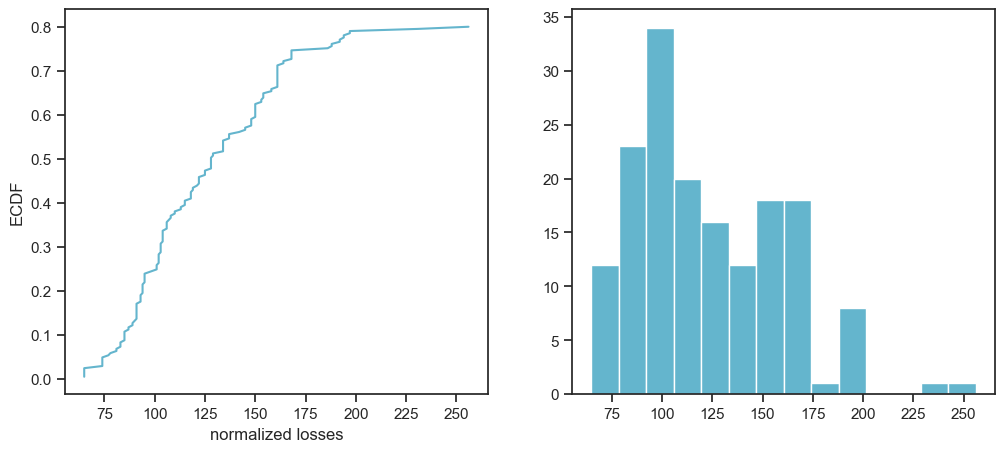

In [7]:
sns.set(style='ticks')
plt.figure(figsize=(12,5))
c='#366DE8'

#ECDF
plt.subplot(121)
cdf = ECDF(data['normalized-losses'])
plt.plot(cdf.x, cdf.y, label='statmodels', color= 'c')
plt.xlabel('normalized losses')
plt.ylabel('ECDF')

#overall distribution
plt.subplot(122)
plt.hist(data['normalized-losses'].dropna(),
        bins=int(np.sqrt(len(data['normalized-losses']))),
        color='c')

In [8]:
data.groupby('symboling')['normalized-losses'].describe()

,count,mean,std,min,25%,50%,75%,max
symboling,,,,,,,,
-2,3.0,103.000000,0.000000,103.0,103.00,103.0,103.0,103.0
-1,20.0,85.600000,18.528499,65.0,71.75,91.5,95.0,137.0
0,48.0,113.166667,32.510773,77.0,91.00,102.0,120.5,192.0
1,47.0,128.574468,28.478630,74.0,105.50,125.0,148.0,231.0
2,29.0,125.689655,30.167513,83.0,94.00,134.0,137.0,192.0
3,17.0,168.647059,30.636867,142.0,150.00,150.0,194.0,256.0


In [9]:
#replacing 
data = data.dropna(subset=['price','bore','stroke','peak-rpm','horsepower','num-of-doors'])
data['normalized-losses'] - data.groupby('symboling')['normalized-losses'].transform(lambda x: x.fillna(x.mean()))

print('In total: ', data.shape)
data.head()

In total:  (193, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [10]:
cormatrix = data.corr()
cormatrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.518344,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835
normalized-losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
wheel-base,-0.536516,-0.060086,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,-0.363194,0.035541,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,-0.247741,0.109726,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,-0.517803,-0.413702,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,-0.231086,0.125858,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine-size,-0.068327,0.207820,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,-0.144785,-0.031558,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,-0.010884,0.063330,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007


In [11]:
cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
cormatrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,0.0,0.518344,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835
normalized-losses,0.0,0.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
wheel-base,-0.0,-0.000000,0.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,-0.0,0.000000,0.000000,0.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,-0.0,0.000000,0.000000,0.000000,0.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,-0.0,-0.000000,0.000000,0.000000,0.000000,0.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine-size,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,-0.0,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,-0.0,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007


In [12]:
cormatrix = cormatrix.stack()
cormatrix

symboling  symboling            0.000000
           normalized-losses    0.518344
           wheel-base          -0.536516
           length              -0.363194
           width               -0.247741
                                  ...   
price      horsepower           0.000000
           peak-rpm            -0.000000
           city-mpg            -0.000000
           highway-mpg         -0.000000
           price                0.000000
Length: 256, dtype: float64

In [13]:
cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
cormatrix

,level_0,level_1,0
0,city-mpg,highway-mpg,0.971975
1,engine-size,price,0.888778
2,length,curb-weight,0.882694
3,wheel-base,length,0.879307
4,width,curb-weight,0.867640
...,...,...,...
251,stroke,width,0.000000
252,stroke,height,-0.000000
253,stroke,curb-weight,0.000000
254,stroke,engine-size,0.000000


In [14]:
data['volume'] = data.length * data.width * data.height
data.drop(['width', 'length', 'height',
          'curb-weight', 'city-mpg'],
         axis=1, 
         inplace=True)

In [15]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'highway-mpg', 'price', 'volume'],
      dtype='object')

C:\Users\guoqi\AppData\Local\Temp\ipykernel_23644\2462080946.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_all, dtype = np.bool)


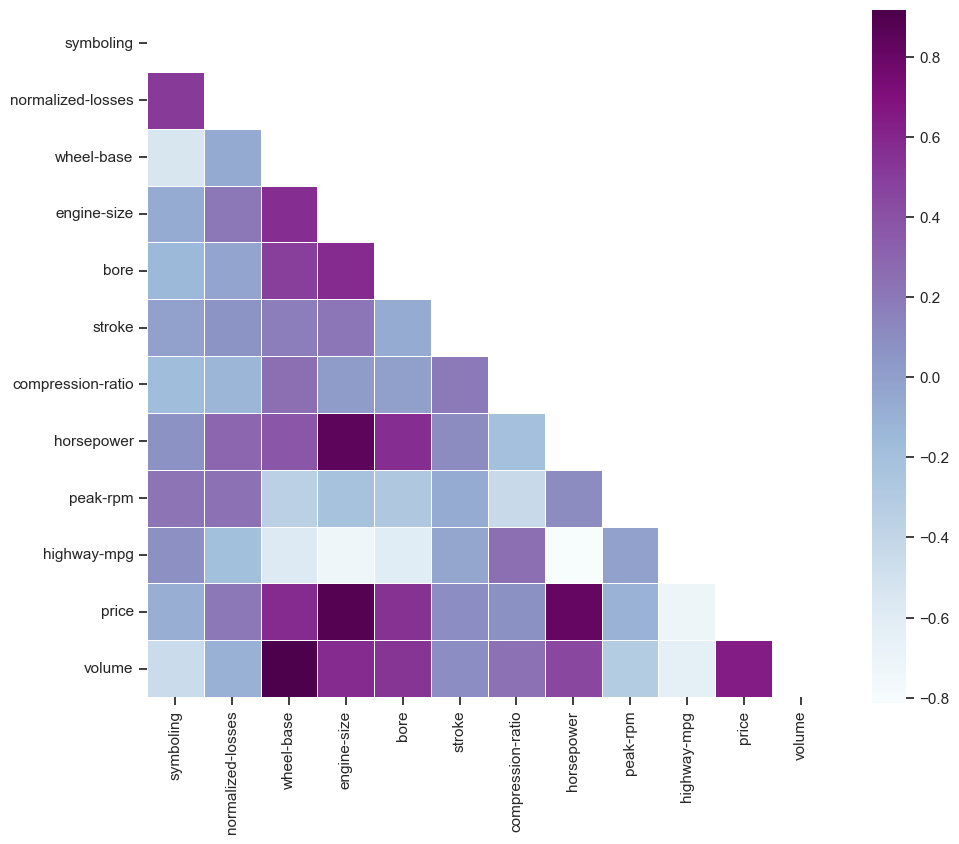

In [16]:
# Compute the correlation matrix 
corr_all = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

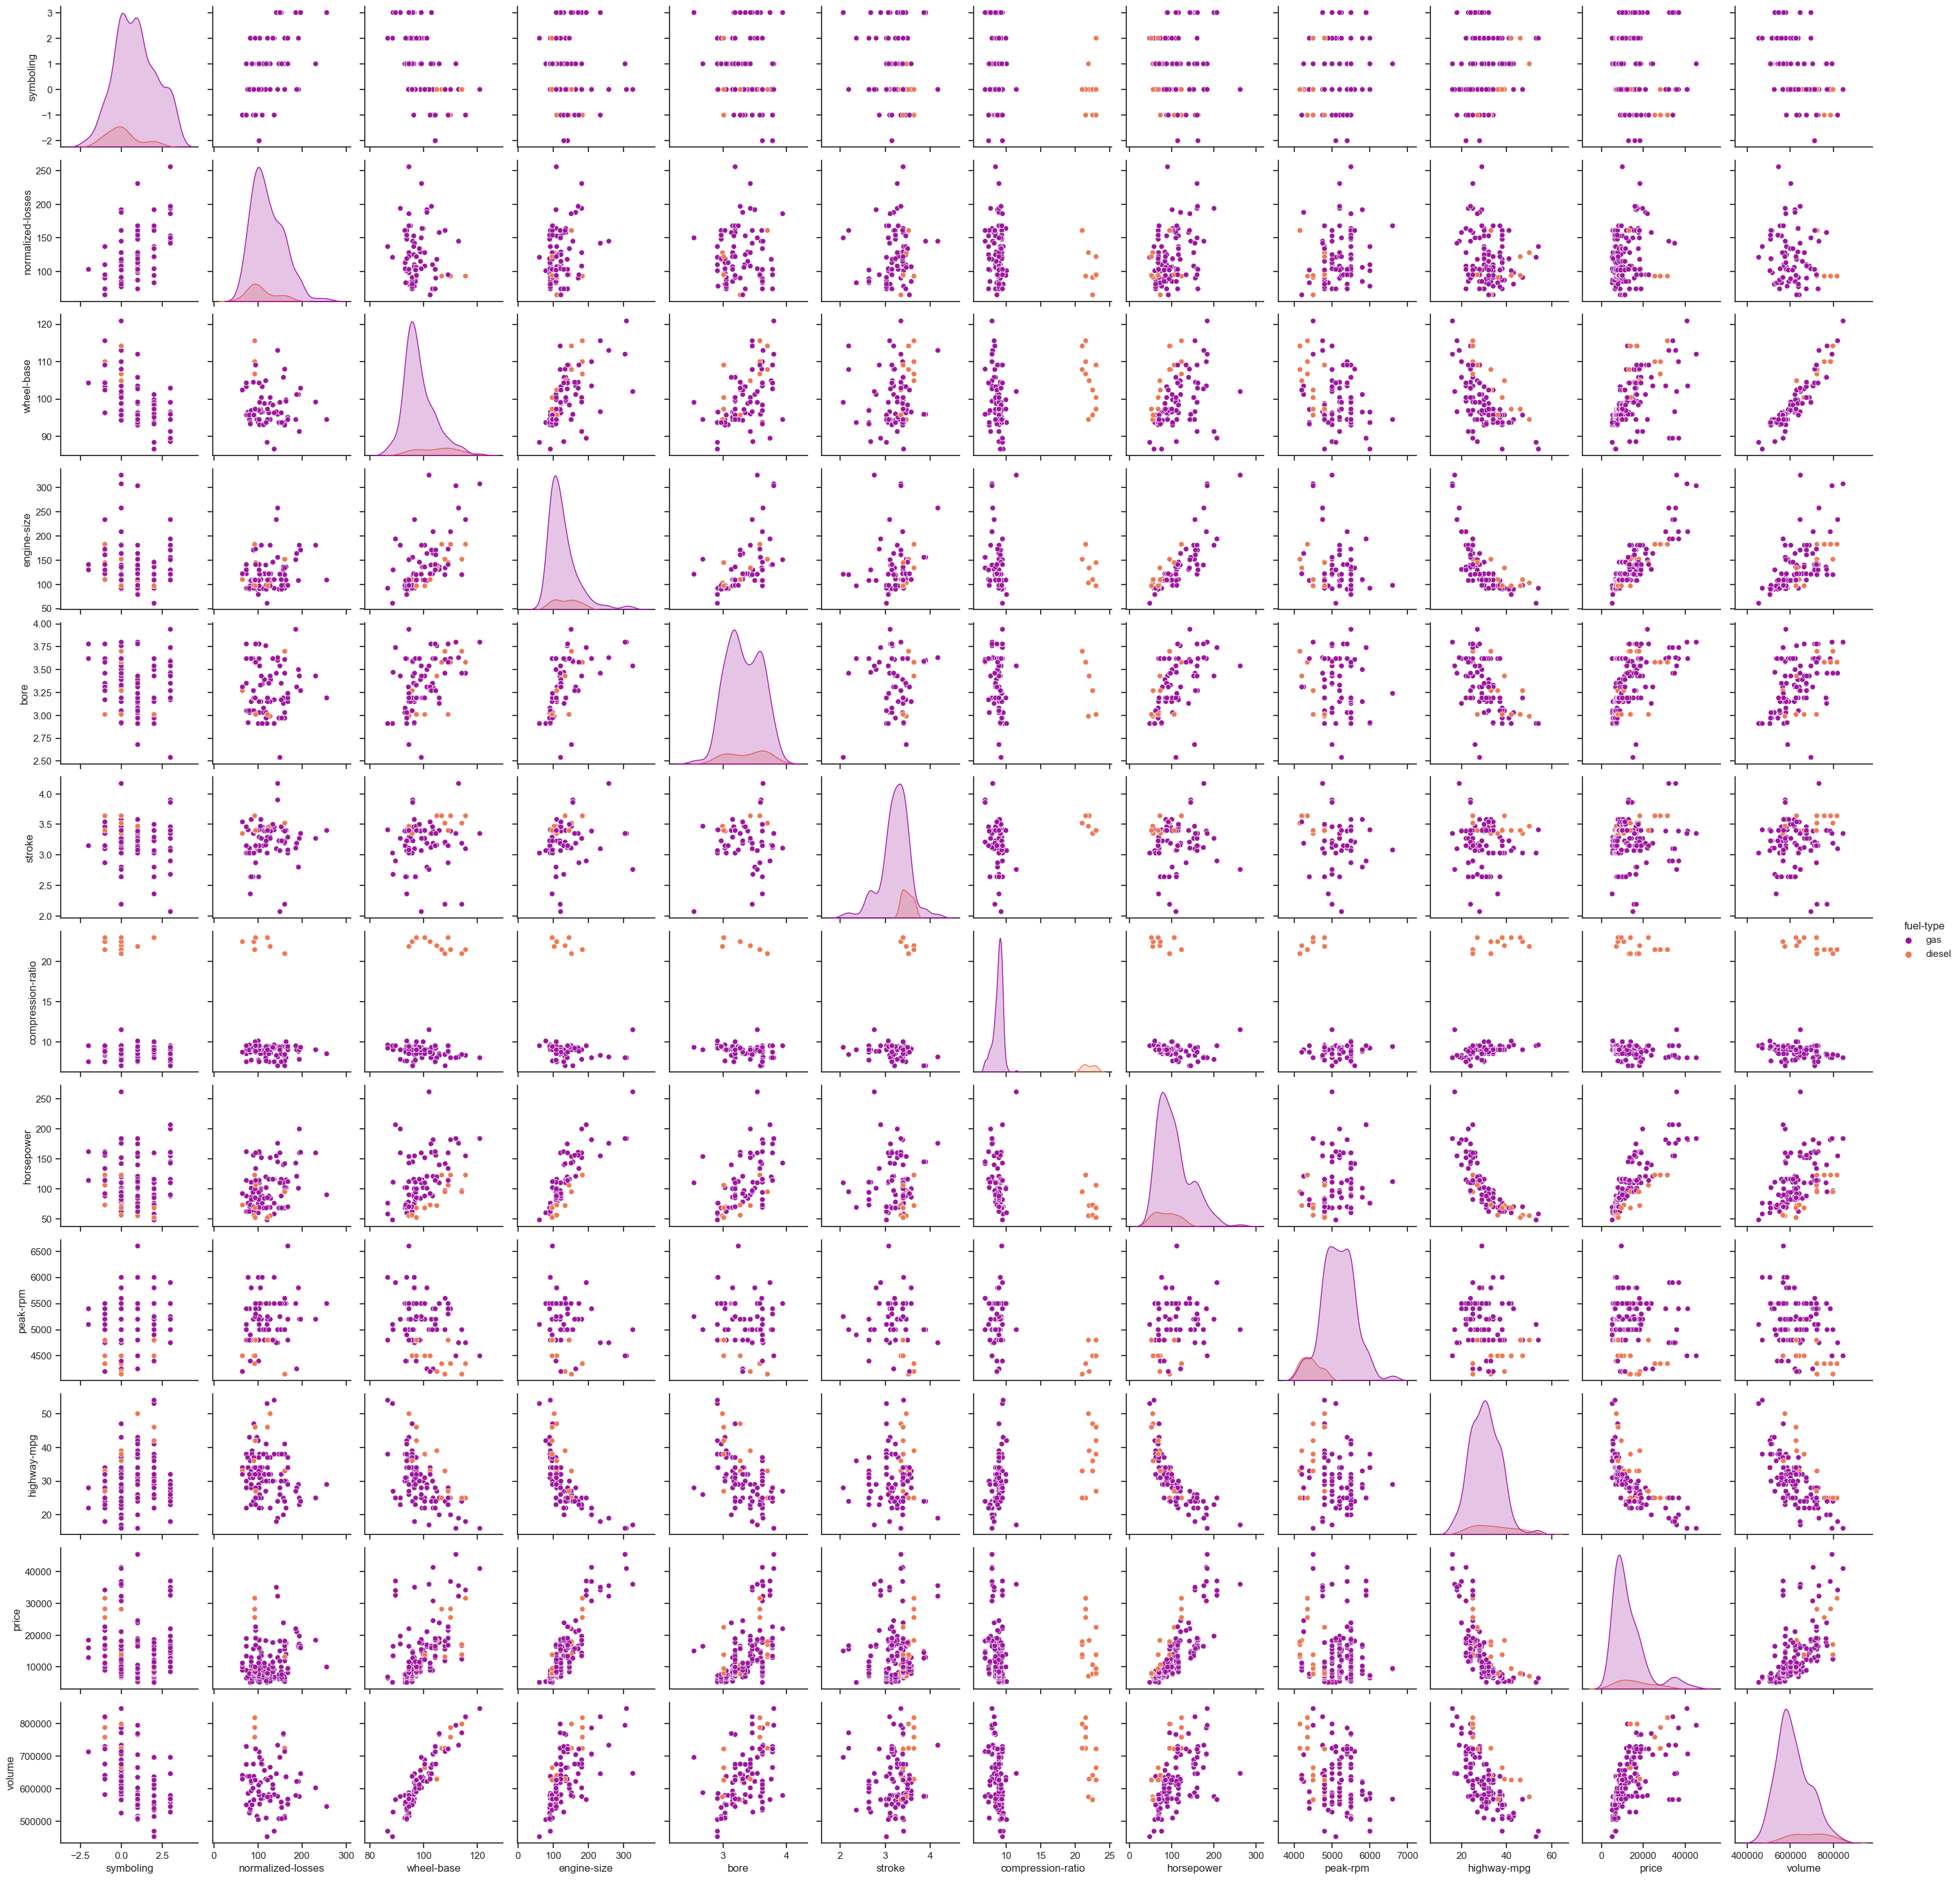

In [17]:
sns.pairplot(data, hue='fuel-type', palette='plasma')

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


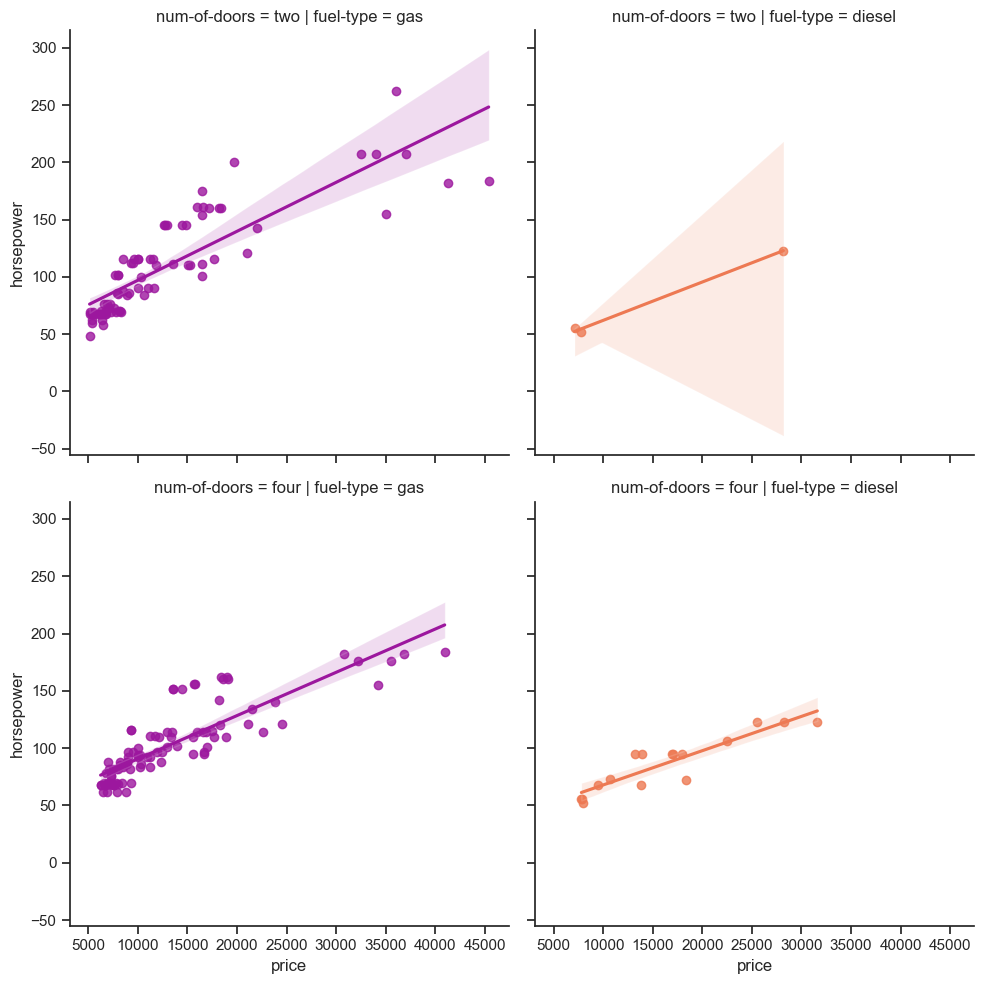

In [18]:
sns.lmplot('price','horsepower',data,
          hue='fuel-type', col='fuel-type', row='num-of-doors',
          palette='plasma',
          fit_reg=True)

阴影为置信区间

#### 预处理

In [19]:
target = data.price

regressors = [x for x in data.columns if x not in ['price']]
features = data.loc[:,regressors]

num = ['symboling','normalized-losses','volume', 'horsepower', 'wheel-base',
       'bore', 'stroke','compression-ratio', 'peak-rpm']

standard_scaler = StandardScaler()
features[num] = standard_scaler.fit_transform(features[num])

features.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,volume
0,1.78685,NaN,alfa-romero,gas,std,two,convertible,rwd,front,-1.682379,...,four,130,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294
1,1.78685,NaN,alfa-romero,gas,std,two,convertible,rwd,front,-1.682379,...,four,130,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294
2,0.16397,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,-0.720911,...,six,152,mpfi,-2.394827,0.702918,-0.288273,1.334283,-0.213359,26,-0.422041
3,0.97541,1.206222,audi,gas,std,four,sedan,fwd,front,0.142781,...,four,109,mpfi,-0.517605,0.480415,-0.036204,-0.039139,0.856208,30,0.169527
4,0.97541,1.206222,audi,gas,std,four,sedan,4wd,front,0.077596,...,five,136,mpfi,-0.517605,0.480415,-0.540341,0.304217,0.856208,22,0.193551


对分类属性就行one-hot编码

In [20]:
# categorical vars
classes = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 
           'body-style', 'drive-wheels', 'engine-location',
           'engine-type', 'num-of-cylinders', 'fuel-system']

# create new dataset with only continios vars 
dummies = pd.get_dummies(features[classes])
features = features.join(dummies).drop(classes, 
                                       axis = 1)

# new dataset
print('In total:', features.shape)
features.head()

In total: (193, 66)


,symboling,normalized-losses,wheel-base,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,...,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.78685,NaN,-1.682379,130,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,...,0,0,0,0,0,0,0,1,0,0
1,1.78685,NaN,-1.682379,130,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,...,0,0,0,0,0,0,0,1,0,0
2,0.16397,NaN,-0.720911,152,-2.394827,0.702918,-0.288273,1.334283,-0.213359,26,...,1,0,0,0,0,0,0,1,0,0
3,0.97541,1.206222,0.142781,109,-0.517605,0.480415,-0.036204,-0.039139,0.856208,30,...,0,0,0,0,0,0,0,1,0,0
4,0.97541,1.206222,0.077596,136,-0.517605,0.480415,-0.540341,0.304217,0.856208,22,...,0,0,0,0,0,0,0,1,0,0


### Lasso回归

In [21]:
X_train,X_test,y_train,y_test = train_test_split(features, target, 
                                                test_size=0.3,
                                                random_state=seed)
print("Train", X_train.shape, "and test", X_test.shape)

Train (135, 66) and test (58, 66)


#logarithmic scale: log base 2
#high values to zero-out more variables
alphas = 2. ** np.arange(2, 12)
scores = np.empty_like(alphas)

for i, a in enumerate(alphas):
    lasso = Lasso(random_state = seed)
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    
lassocv = LassoCV(cv = 10, random_state = seed)
lassocv.fit(features, target)
lassocv_score = lassocv.score(features, target)
lassocv_alpha = lassocv.alpha_

plt.figure(figsize = (10, 4))
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color = c)
plt.xlabel(r'$\alpha$')
plt.ylabel('CV Score')
plt.xscale('log', basex = 2)
sns.despine(offset = 15)

print('CV results:', lassocv_score, lassocv_alpha)

In [28]:
# predictions
d = {'true' : list(y_test),
     'predicted' : pd.Series(y_pred_l1)
    }

pd.DataFrame(d).head()
MSE(y_test, y_pred_l1); R2(y_test, y_pred_l1)

NameError: name 'y_pred_l1' is not defined